In [1]:
import numpy as np
import csv
import pandas as pd
import time 
import LESbplume as lp

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from matplotlib import animation
from skimage import measure
import os

#(r"D:\Ammonia_NBL_3D\NBL_3D_T_F100_600_Hot_Buoyant.csv",skiprows = sk,nrows = n, dtype =np.float32,header = None)
#(r"D:\Helium_FLUX_1\He_h01_01_T.csv",skiprows = sk,nrows = n, dtype =np.float32)

ModuleNotFoundError: No module named 'LESbplume'

In [2]:
Start = 150 # numer of rows in dataset
End = 300 # time start

sk = Start*45*45*700
nt = End - Start
n = 45*45*700*nt
name = 'Helium_2(540)_lambda2'
#INPUT the path of the file
ome = pd.read_csv(r"D:\Documents\Helium_2(540)_lambda2.csv",skiprows = sk,nrows = n, dtype =np.float32,header = None) #,skiprows = sk,nrows = n
omega = ome.to_numpy()
del ome
omega = np.reshape(omega, (45,45,700,nt), order="F")

dft = pd.read_csv(r"D:\Documents\Helium_2\Helium_2_T.csv",skiprows = sk,nrows = n, dtype =np.float32, header = None)
datat = dft.to_numpy()
datat = np.reshape(datat,  (45,45,700,nt), order="F")
del dft
tmax = datat.max()
tmin = datat.min()
datat = (datat-tmin)/(tmax - tmin)

# dfu = pd.read_csv(r"D:\Documents\Helium_2\Helium_2_U.csv",skiprows = sk,nrows = n, dtype =np.float32, header = None)
# datau = dfu.to_numpy()
# datau = np.reshape(datau,  (nx,ny,nz,nt), order="F")
# del dfu

# # V data
# dfv = pd.read_csv(r"D:\Documents\Helium_2\Helium_2_V.csv",skiprows = sk,nrows = n, dtype =np.float32, header = None)
# datav = dfv.to_numpy()
# datav = np.reshape(datav,  (nx,ny,nz,nt), order="F")
# del dfv

# # W data
# dfw = pd.read_csv(r"D:\Documents\Helium_2\Helium_2_W.csv",skiprows = sk,nrows = n, dtype =np.float32, header = None)
# dataw = dfw.to_numpy()
# dataw = np.reshape(dataw,  (nx,ny,nz,nt), order="F")
# del dfw

dx = dy =40
dz = 10
nx, ny, nz, nt = lp.shape(omega)

In [ ]:
# Calculate Omega vortex criterion
# Estimated time: 8 minutes
# Input (u,v,w,dx,dy,dz)

tic = time.perf_counter()

omega = lp.omega(datau,datav,dataw,dx,dy,dz) # calculated the omega vortex criterion and put it in the 'ome' matrix

toc1 = time.perf_counter()
print(f"Finished Time: {((toc1 - tic)/60):0.4f} minutes")

In [ ]:

omega = ome
D =400
isovalue = 0.52 #omega
# isovalue = -np.exp(-9) #lamda2


def isosurface_timestep(data,timestep,isovalue,name, figsize =30,frame = 5):
    
    if not os.path.exists(name):
        os.makedirs(name)
    angle = 0 
    while(angle<=360):
        nameg  = name+' Time:'+str(timestep)+' Angle:'+str(angle)
        vol = omega[:,:,:,timestep]
        verts, faces, _, _ = measure.marching_cubes_lewiner(vol, isovalue, spacing=(dx, dy, dz))
        fig = plt.figure(figsize=(figsize, figsize*2.5))
        # plt.rcParams['savefig.facecolor'] = "0.8"
        ax = fig.add_subplot(111, projection='3d',facecolor='w',label='Inline label')

        mesh = Poly3DCollection(verts[faces])
        mesh.set_edgecolor('k')
        ax.add_collection3d(mesh)
        ax.view_init(10,angle)

        ax.set_xlabel("X/D",fontsize = 50,labelpad=40)
        ax.set_ylabel("Y/D",fontsize = 50,labelpad=40)
        ax.set_zlabel("Z/D",fontsize = 50,labelpad=100)
        # Title:
        namel = len(nameg)
        namexpos = 0.5-0.01*namel   
        ax.text2D(namexpos, 0.85, nameg, transform=ax.transAxes,fontsize = 65)

        ticnum = 11
        ticnumz = 14
        xaxis = []
        for x in range (np.int(-(ticnum-1)/2),np.int((ticnum+1)/2)):
            xaxis.append(((nx-1)*dx/(ticnum-1)*x)/D)
        yaxis = []
        for y in range (np.int(-(ticnum-1)/2),np.int((ticnum-1)/2)):
            yaxis.append(((ny-1)*dy/(ticnum-1)*y)/D)
        zaxis = []
        for z in range (0,np.int((ticnumz+1))):
            zaxis.append(z*(dz*nz/ticnumz)/D)
        ax.set_xticks(np.linspace(0, nx*dx, ticnum))
        ax.set_yticks(np.linspace(0, ny*dy, ticnum))
        ax.set_xticklabels(xaxis)
        ax.set_yticklabels(yaxis)
        ax.invert_yaxis()
        ax.set_zticks(np.linspace(0, nz*dz, ticnumz+1))
        ax.set_zticklabels(zaxis) 
        ax.tick_params(axis='both', which='major', labelsize=30)

        plt.tight_layout()
        filename=name+'_T'+str(timestep)+'/'+name+'_t'+str(angle)+'.png'
        print(filename)

        bbox = fig.bbox_inches.from_bounds(1, 9, 28,58 )
        plt.savefig(name+'/'+name+' '+str(angle)+'.png', bbox_inches=bbox)
        angle = angle + 18
        
        
        
        
timestep = 396    
name = 'Helium2_single('+str(timestep)+')_Omega'
isosurface_timestep(omega,timestep,isovalue,name)

83742
[4.6932724e-05 8.2405451e-05 8.2405451e-05 ... 9.4122850e-05 5.8453792e-05
 5.8453792e-05]


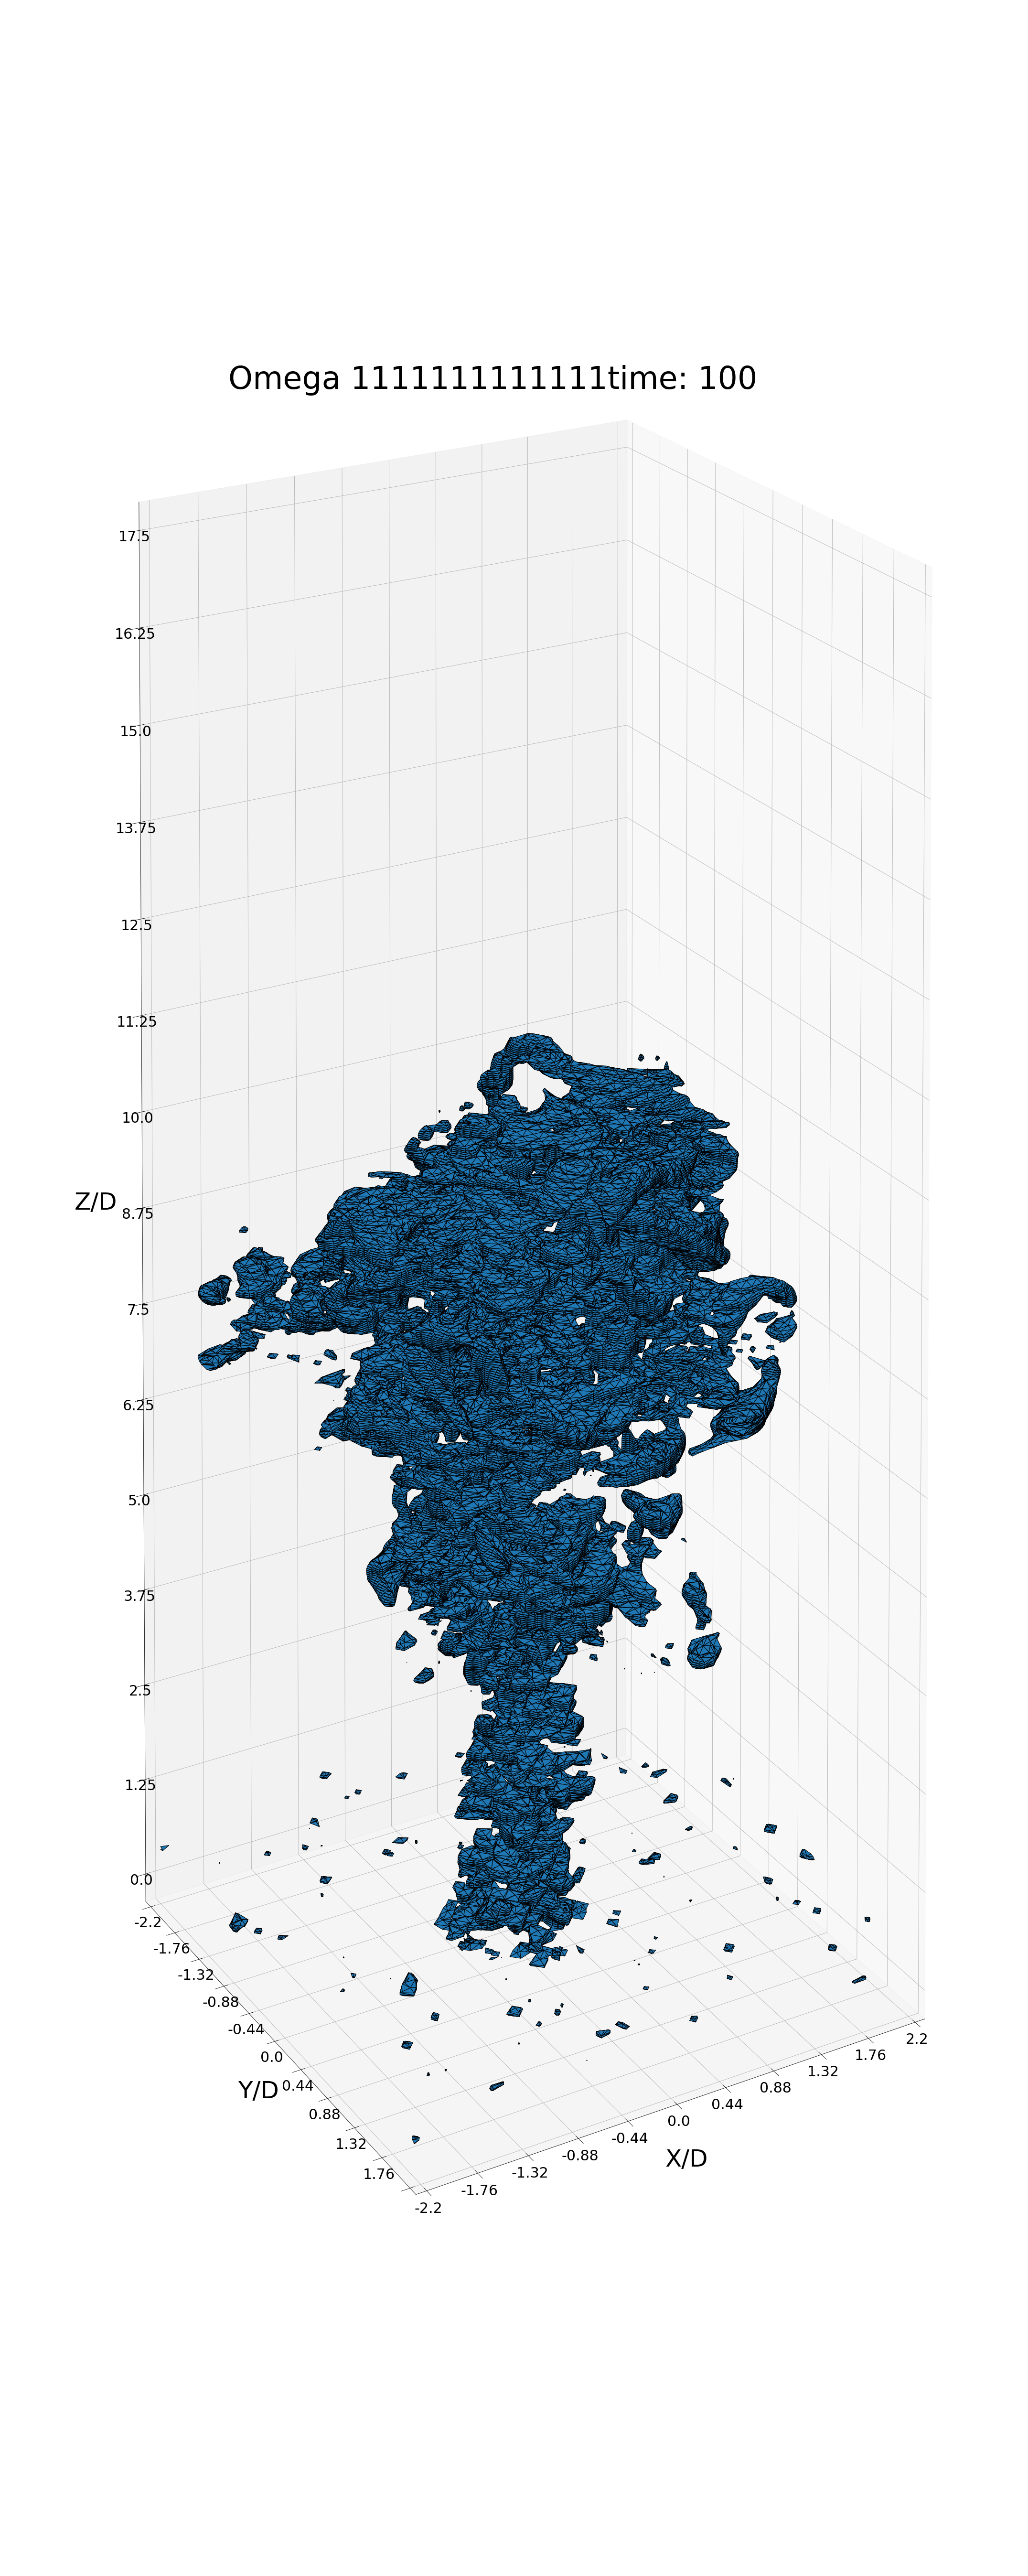

Omega 1111111111111time: 100/Omega 1111111111111time: 100_t100.png


In [61]:
t = 100
figsize = 30
name = 'testingfig'
D =400
isovalue = 0.52 #omega
isovalue = -np.exp(-10) #lamda2

name  = "Omega 1111111111111time: "+str(t)
vol = omega[:,:,:,t]
temp = datat[:,:,:,t]
temp = plt.cm.Blues(np.linspace(0,1,200))
# print(temp)
verts, faces, normals, values= measure.marching_cubes_lewiner(vol, isovalue, spacing=(dx, dy, dz))
fig = plt.figure(figsize=(figsize, figsize*2.5))
# plt.rcParams['savefig.facecolor'] = "0.8"
ax = fig.add_subplot(111, projection='3d',facecolor='w',label='Inline label')

# ax.plot_trisurf(verts[:, 0], verts[:,1], faces, verts[:, 2],cmap='Accent', antialiased=True)

# import matplotlib.colors as colors
# import matplotlib.cm as cm
# colors = cm.jet(datat)
# print(np.shape(datat))
# print(np.shape(colors))
# colors = colors.reshape(-1,4)

mesh = Poly3DCollection(verts[faces])
mesh.set_edgecolor('k')
print(np.size(values))
print(values)
# mesh.set_facecolor(None)
ax.add_collection3d(mesh)


ax.view_init(10,60)

ax.set_xlabel("X/D",fontsize = 50,labelpad=40)
ax.set_ylabel("Y/D",fontsize = 50,labelpad=40)
ax.set_zlabel("Z/D",fontsize = 50,labelpad=100)
# Title:
namel = len(name)
namexpos = 0.5-0.01*namel
# if(namel>30):    
ax.text2D(namexpos, 0.85, name, transform=ax.transAxes,fontsize = 65)
          
ticnum = 11
ticnumz = 14
xaxis = []
for x in range (np.int(-(ticnum-1)/2),np.int((ticnum+1)/2)):
    xaxis.append(((nx-1)*dx/(ticnum-1)*x)/D)
yaxis = []
for y in range (np.int(-(ticnum-1)/2),np.int((ticnum-1)/2)):
    yaxis.append(((ny-1)*dy/(ticnum-1)*y)/D)
zaxis = []
for z in range (0,np.int((ticnumz+1))):
    zaxis.append(z*(dz*nz/ticnumz)/D)
ax.set_xticks(np.linspace(0, nx*dx, ticnum))
ax.set_yticks(np.linspace(0, ny*dy, ticnum))
ax.set_xticklabels(xaxis)
ax.set_yticklabels(yaxis)
ax.invert_yaxis()
ax.set_zticks(np.linspace(0, nz*dz, ticnumz+1))
ax.set_zticklabels(zaxis) 
ax.tick_params(axis='both', which='major', labelsize=30)

plt.tight_layout()
plt.show()

filename=name+'/'+name+'_t'+str(t)+'.png'
print(filename)

# bbox = fig.bbox_inches.from_bounds(1, 9, 28,58 )
# plt.savefig('3d_whitespace3.png', bbox_inches=bbox)

# plt.savefig("filename",facecolor = 'blue', bbox_inches='tight',pad_inches = 0)

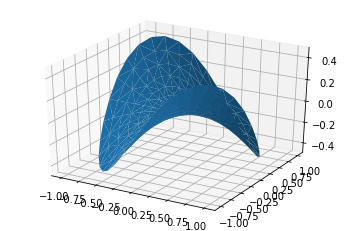

In [11]:
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
import numpy as np


n_radii = 8
n_angles = 36

# Make radii and angles spaces (radius r=0 omitted to eliminate duplication).
radii = np.linspace(0.125, 1.0, n_radii)
angles = np.linspace(0, 2*np.pi, n_angles, endpoint=False)[..., np.newaxis]

# Convert polar (radii, angles) coords to cartesian (x, y) coords.
# (0, 0) is manually added at this stage,  so there will be no duplicate
# points in the (x, y) plane.
x = np.append(0, (radii*np.cos(angles)).flatten())
y = np.append(0, (radii*np.sin(angles)).flatten())

# Compute z to make the pringle surface.
z = np.sin(-x*y)

fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot_trisurf(x, y, z, linewidth=0.2, antialiased=True)

plt.show()

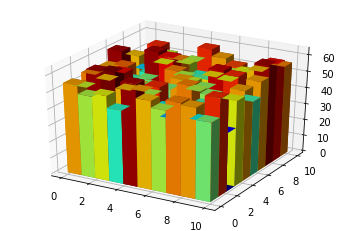

In [43]:
import numpy as np
import matplotlib.colors as colors
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

samples = np.random.randint(10,size=(5000,2))

F = np.zeros([10,10])
for s in samples:
    F[s[0],s[1]] += 1

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x_data, y_data = np.meshgrid( np.arange(F.shape[1]),
                              np.arange(F.shape[0]) )
x_data = x_data.flatten()
y_data = y_data.flatten()
z_data = F.flatten()

dz = F
offset = dz + np.abs(dz.min())
fracs = offset.astype(float)/offset.max()
norm = colors.Normalize(fracs.min(), fracs.max())
colors = cm.jet(norm(fracs))

ax.bar3d(x_data,y_data,np.zeros(len(z_data)),1,1,z_data,color=colors.reshape(-1,4) )
plt.show()

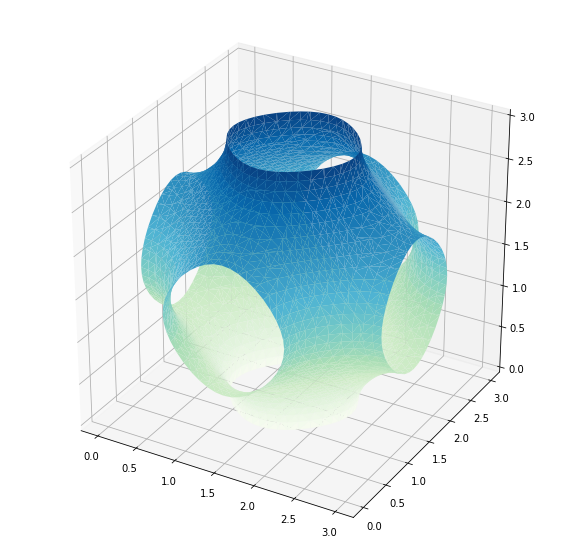

In [38]:
import numpy as np
from numpy import cos, pi
from skimage.measure import marching_cubes_lewiner
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x, y, z = pi*np.mgrid[-1:1:31j, -1:1:31j, -1:1:31j]
vol = cos(x) + cos(y) + cos(z)
verts, faces, _, _ = marching_cubes_lewiner(vol, 0, spacing=(0.1, 0.1, 0.1))

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(verts[:, 0], verts[:,1], faces, verts[:, 2], cmap='GnBu',
                lw=1)
plt.show()

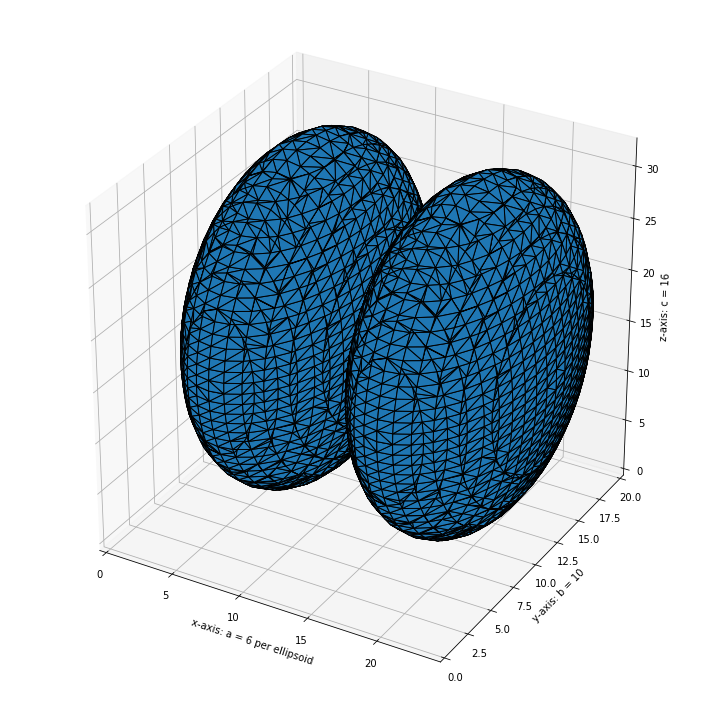

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

from skimage import measure
from skimage.draw import ellipsoid


# Generate a level set about zero of two identical ellipsoids in 3D
ellip_base = ellipsoid(6, 10, 16, levelset=True)
ellip_double = np.concatenate((ellip_base[:-1, ...],
                               ellip_base[2:, ...]), axis=0)

# Use marching cubes to obtain the surface mesh of these ellipsoids
verts, faces, normals, values = measure.marching_cubes_lewiner(ellip_double, 0)

# Display resulting triangular mesh using Matplotlib. This can also be done
# with mayavi (see skimage.measure.marching_cubes_lewiner docstring).
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Fancy indexing: `verts[faces]` to generate a collection of triangles
mesh = Poly3DCollection(verts[faces])
mesh.set_edgecolor('k')
# mesh.set_facecolor(values)
ax.add_collection3d(mesh)

ax.set_xlabel("x-axis: a = 6 per ellipsoid")
ax.set_ylabel("y-axis: b = 10")
ax.set_zlabel("z-axis: c = 16")

ax.set_xlim(0, 24)  # a = 6 (times two for 2nd ellipsoid)
ax.set_ylim(0, 20)  # b = 10
ax.set_zlim(0, 32)  # c = 16

plt.tight_layout()
plt.show()